# 1. Analisar e pré-processar os dados fornecidos

## Importando os dados e exibindo amostra

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report



In [36]:
df = pd.read_csv('/content/seeds_dataset.csv',sep='\t')

# Exibir amostra de 05 linhas do DataFrame
df.sample(5)

,Area,Perimetro,Compacidade,Comp-Nucleo,Larg-Nucleo,Coef-assimetria,Comp-Sulco_nucleo,Var-Trigo
176,11.26,13.01,0.8355,5186.0,2.71,5335.0,5092.0,3
167,12.15,13.45,0.8443,5417.0,2837.00,3638.0,5338.0,3
87,18.98,16.66,859.0000,6549.0,3.67,3691.0,6498.0,2
106,18.85,16.17,0.9056,6152.0,3806.00,2843.0,6.2,2
145,11.21,13.13,0.8167,5279.0,2687.00,6169.0,5275.0,3


## Calculando as medidas descritivas

In [19]:
# Medidas descritivas dataframe
df.describe()

,Area,Perimetro,Compacidade,Comp-Nucleo,Larg-Nucleo,Coef-assimetria,Comp-Sulco_nucleo,Var-Trigo
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,100.756727,5082.127905,3016.799190,3451.734430,4814.142143,2.000000
std,2.909699,1.305959,278.788023,1748.744663,937.989102,1781.918409,1753.777465,0.818448
min,10.590000,12.410000,0.808100,5.090000,2.630000,0.765100,4.830000,1.000000
25%,12.270000,13.450000,0.858500,5183.750000,2879.000000,2238.250000,4961.000000,1.000000
50%,14.355000,14.320000,0.877550,5463.000000,3201.000000,3528.500000,5175.500000,2.000000
75%,17.305000,15.715000,0.897700,5978.750000,3510.750000,4708.750000,5826.500000,3.000000
max,21.180000,17.250000,905.000000,6675.000000,4033.000000,8456.000000,6498.000000,3.000000


## Visualizando a distribuição das características

>* Usando histograma

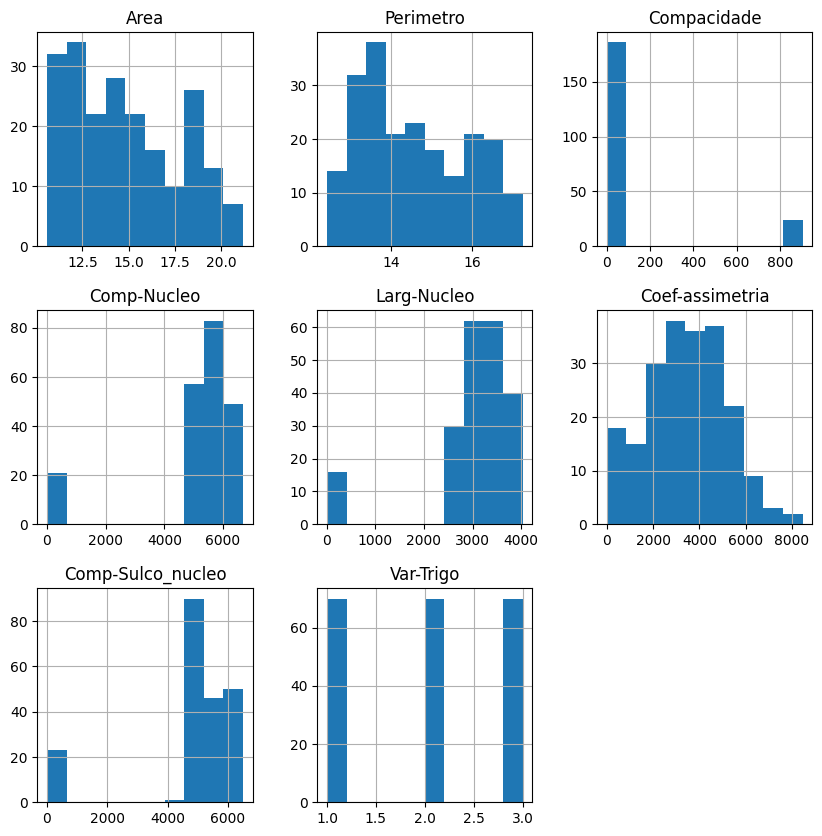

In [22]:
# Usando histograma
df.hist(figsize=(10,10))
plt.show()

>* Usando boxplots

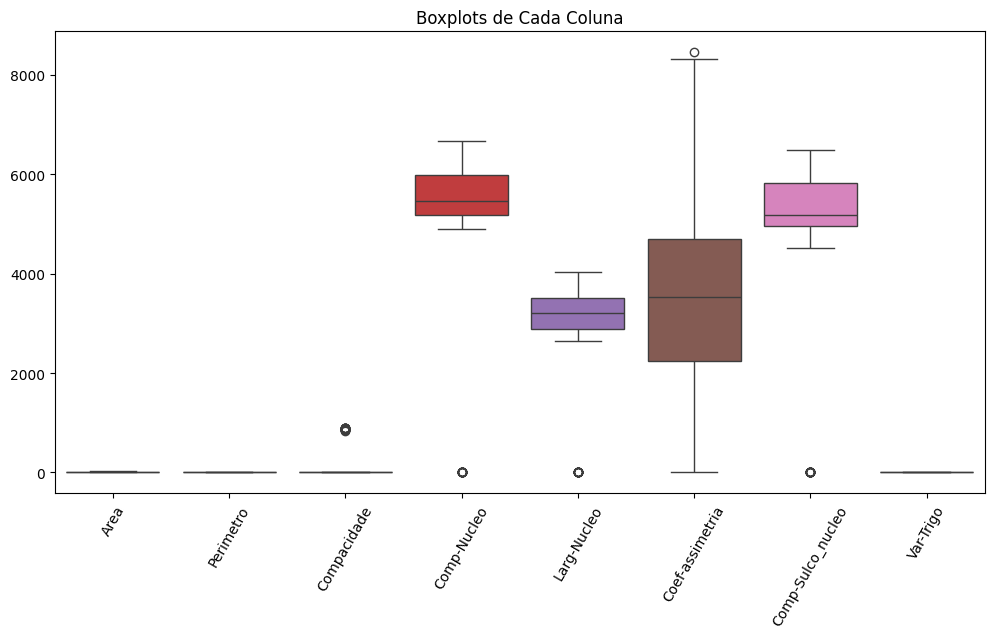

In [31]:
# Usando boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplots de Cada Coluna")
plt.xticks(rotation=60)
plt.show()

## Verificando dados ausentes

In [34]:
# Usando "isnull" combinado com "sum" para verificar ausentes e dizer quantidade
df.isnull().sum()

,0
Area,0
Perimetro,0
Compacidade,0
Comp-Nucleo,0
Larg-Nucleo,0
Coef-assimetria,0
Comp-Sulco_nucleo,0
Var-Trigo,0


>* Verificar correlação entre as variaveis

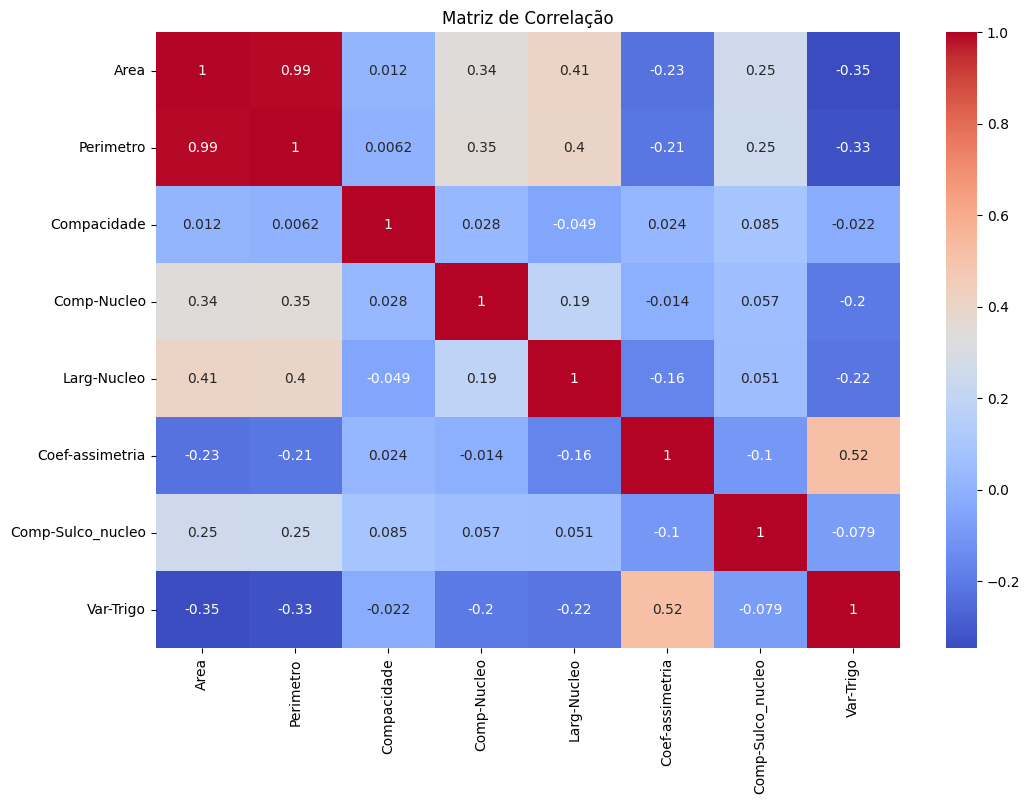

In [33]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

## gráficos de dispersão para identificar possíveis relações entre as características

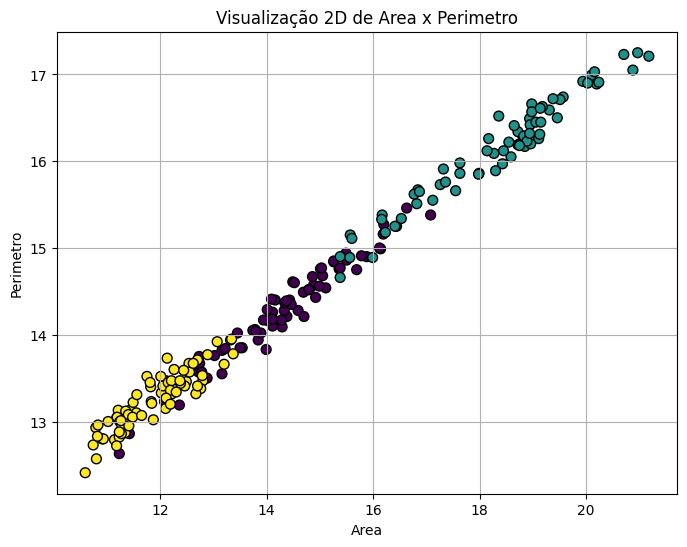

In [40]:
# Visualizar 2D entre area e perimetro
plt.figure(figsize =(8,6))
colors = np.array(['red','green','blue'])
plt.scatter(df['Area'],df['Perimetro'],c=df['Var-Trigo'],cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Area')
plt.ylabel('Perimetro')
plt.title('Visualização 2D de Area x Perimetro')
plt.grid(True)
plt.show()

## Separando features e labels

In [41]:
from re import X
# Separando features e labels
X = df[['Area', 'Perimetro', 'Compacidade', 'Comp-Nucleo', 'Larg-Nucleo', 'Coef-assimetria', 'Comp-Sulco_nucleo']]
y = df['Var-Trigo']

## Escalonando os dados

In [54]:
#aplicando MinMaxScaler
scaler_minmax = MinMaxScaler()
x_minmax = scaler_minmax.fit_transform(X)

# Mostrando as primeiras linhas dos dados escalados( MinMaxScaler) 0 - 1
df_scaled = pd.DataFrame(x_minmax, columns=X.columns)
df_scaled.sample(5)


,Area,Perimetro,Compacidade,Comp-Nucleo,Larg-Nucleo,Coef-assimetria,Comp-Sulco_nucleo
188,0.060434,0.084711,0.000057,0.762216,0.699283,0.889772,0.762674
55,0.419263,0.487603,0.000064,0.854121,0.796297,0.228525,0.836906
144,0.116147,0.204545,0.000021,0.795949,0.688366,0.528694,0.796709
187,0.030217,0.080579,0.000032,0.762066,0.663058,0.494160,0.762520
182,0.151086,0.196281,0.000055,0.000022,0.721117,0.574347,0.793629


In [55]:
# concatenar df_scaled com y
df_scaled = pd.concat([df_scaled, y], axis=1)
df_scaled.sample(5)

,Area,Perimetro,Compacidade,Comp-Nucleo,Larg-Nucleo,Coef-assimetria,Comp-Sulco_nucleo,Var-Trigo
159,0.084986,0.167355,0.000020,0.794450,0.668021,0.637148,0.000074,3
201,0.196412,0.188017,0.000099,0.746473,0.777192,0.000182,0.730024,3
105,0.778093,0.801653,0.000092,0.904347,0.938715,0.301853,0.904669,2
80,0.560907,0.605372,0.000082,0.880058,0.859566,0.654179,0.000162,2
16,0.321058,0.293388,0.000122,0.766713,0.838724,0.618934,0.735568,1


In [71]:
# Usando "isnull" combinado com "sum" para verificar ausentes e dizer quantidade
df_scaled.isnull().sum()

,0
Area,0
Perimetro,0
Compacidade,0
Comp-Nucleo,0
Larg-Nucleo,0
Coef-assimetria,0
Comp-Sulco_nucleo,0
Var-Trigo,0


# 2. Implementar e comparar diferentes algoritmos de classificação:


>* Dividindo os dados em treino e teste


In [57]:
# Dividindo o Dataframe em 70% para treino e 30% para teste
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

>* Utilizando o modelo Random Forest

In [65]:
# Testando com Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)
# accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Acuracia do modelo Random Forest: {accuracy_rf:.2f}')
# precision
precision_rf = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão do modelo Random Forest: {precision_rf:.2f}')
# Recall
recall_rf = recall_score(y_test, y_pred, average='weighted')
print(f'Recall do modelo Random Forest: {recall_rf:.2f}')
# F1-Score
f1_rf = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score do modelo Random Forest: {f1_rf:.2f}')
# Matriz de Confusão
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão do modelo Random Forest:")
print(conf_matrix_rf)

Acuracia do modelo Random Forest: 0.89
Precisão do modelo Random Forest: 0.90
Recall do modelo Random Forest: 0.89
F1-Score do modelo Random Forest: 0.89
Matriz de Confusão do modelo Random Forest:
[[18  0  2]
 [ 1 20  0]
 [ 4  0 18]]


>* Utilizando modelo SVM

In [66]:
# Testando com SVM
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
# accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Acuracia do modelo SVM: {accuracy_svm:.2f}')
# precision
precision_svm = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão do modelo SVM: {precision_svm:.2f}')
# Recall
recall_svm = recall_score(y_test, y_pred, average='weighted')
print(f'Recall do modelo SVM: {recall_svm:.2f}')
# F1-Score
f1_svm = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score do modelo SVM: {f1_svm:.2f}')
# Matriz de Confusão
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão do modelo SVM:")
print(conf_matrix_svm)



Acuracia do modelo SVM: 0.76
Precisão do modelo SVM: 0.79
Recall do modelo SVM: 0.76
F1-Score do modelo SVM: 0.77
Matriz de Confusão do modelo SVM:
[[17  0  3]
 [ 3 15  3]
 [ 6  0 16]]


>* Utilizando modelo KNN

In [64]:
# Testando com KNN
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
# accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Acuracia do modelo KNN: {accuracy_knn:.2f}')
# precision
precision_knn = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão do modelo KNN: {precision_knn:.2f}')
# Recall
recall_knn = recall_score(y_test, y_pred, average='weighted')
print(f'Recall do modelo KNN: {recall_knn:.2f}')
# F1-Score
f1_knn = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score do modelo KNN: {f1_knn:.2f}')
# Matriz de Confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão do modelo KNN:")
print(conf_matrix_knn)

Acuracia do modelo KNN: 0.75
Precisão do modelo KNN: 0.76
Recall do modelo KNN: 0.75
F1-Score do modelo KNN: 0.75
Matriz de Confusão do modelo KNN:
[[15  1  4]
 [ 5 15  1]
 [ 4  1 17]]


## Comparando o desempenho dos diferentes algoritmos.

**1. Random Forest**
    
    O modelo Random Forest apresenta o melhor desempenho geral, com alta acurácia, precisão, recall e F1-score.

    A matriz de confusão indica que o modelo tem baixa quantidade de falsos positivos e falsos negativos, embora tenha mais dificuldade em classificar corretamente a terceira classe (4 erros).


**2. SVM (Support Vector Machine)**

    O modelo SVM tem desempenho moderado, com menor acurácia, recall e F1-score do que o Random Forest.

    A matriz de confusão mostra dificuldades com todas as classes, especialmente para a segunda e terceira, onde ocorrem mais falsos negativos.

**3. KNN (K-Nearest Neighbors)**

    O modelo KNN tem desempenho semelhante ao SVM, com métricas ainda menores que as do Random Forest.

    A matriz de confusão revela dificuldades maiores em classificar corretamente as três classes, com erros distribuídos mais uniformemente.

# 3. Randomized Search para encontrar os melhores hiperparâmetros para cada modelo.

## 1. Random Forest


In [70]:
# 1. Random Forest
rf_param_grid = {
    'n_estimators': [int(x) for x in np.linspace(10, 200, 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 50, 5)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid,
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(x_train, y_train)

print("Best Parameters for Random Forest:", rf_random.best_params_)
rf_best = rf_random.best_estimator_
rf_predictions = rf_best.predict(x_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
69 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.85      0.79        20
           2       1.00      0.90      0.95        21
           3       0.86      0.82      0.84        22

    accuracy                           0.86        63
   macro avg       0.87      0.86      0.86        63
weighted avg       0.87      0.86      0.86        63



### Novamente Random Forest com os Melhores Hiperparametros

In [72]:
# Testando com Random Forest
model_rf = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf= 2
                                  ,max_features='log2', max_depth=20)
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)
# accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Acuracia do modelo Random Forest: {accuracy_rf:.2f}')
# precision
precision_rf = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão do modelo Random Forest: {precision_rf:.2f}')
# Recall
recall_rf = recall_score(y_test, y_pred, average='weighted')
print(f'Recall do modelo Random Forest: {recall_rf:.2f}')
# F1-Score
f1_rf = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score do modelo Random Forest: {f1_rf:.2f}')
# Matriz de Confusão
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão do modelo Random Forest:")
print(conf_matrix_rf)


Acuracia do modelo Random Forest: 0.86
Precisão do modelo Random Forest: 0.86
Recall do modelo Random Forest: 0.86
F1-Score do modelo Random Forest: 0.86
Matriz de Confusão do modelo Random Forest:
[[17  0  3]
 [ 1 20  0]
 [ 5  0 17]]


## 2. SVM

In [73]:
# 2. SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

svm = SVC(random_state=42)
svm_random = RandomizedSearchCV(estimator=svm, param_distributions=svm_param_grid,
                                n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
svm_random.fit(x_train, y_train)

print("Best Parameters for SVM:", svm_random.best_params_)
svm_best = svm_random.best_estimator_
svm_predictions = svm_best.predict(x_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for SVM: {'kernel': 'linear', 'gamma': 1, 'C': 1}
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.75      0.75        20
           2       1.00      0.86      0.92        21
           3       0.80      0.91      0.85        22

    accuracy                           0.84        63
   macro avg       0.85      0.84      0.84        63
weighted avg       0.85      0.84      0.84        63



### Novamente SVM com os Melhores Hiperparametros

In [74]:
# Testando com SVM
model_svm = SVC(kernel='linear', gamma=1, C=1)
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
# accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'Acuracia do modelo SVM: {accuracy_svm:.2f}')
# precision
precision_svm = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão do modelo SVM: {precision_svm:.2f}')
# Recall
recall_svm = recall_score(y_test, y_pred, average='weighted')
print(f'Recall do modelo SVM: {recall_svm:.2f}')
# F1-Score
f1_svm = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score do modelo SVM: {f1_svm:.2f}')
# Matriz de Confusão
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão do modelo SVM:")
print(conf_matrix_svm)

Acuracia do modelo SVM: 0.84
Precisão do modelo SVM: 0.85
Recall do modelo SVM: 0.84
F1-Score do modelo SVM: 0.84
Matriz de Confusão do modelo SVM:
[[15  0  5]
 [ 3 18  0]
 [ 2  0 20]]


## 3. KNN (K-Nearest Neighbors)

In [75]:
# 3. KNN
knn_param_grid = {
    'n_neighbors': [int(x) for x in np.linspace(1, 30, 30)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=knn_param_grid,
                                n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
knn_random.fit(x_train, y_train)

print("Best Parameters for KNN:", knn_random.best_params_)
knn_best = knn_random.best_estimator_
knn_predictions = knn_best.predict(x_test)
print("KNN Classification Report:\n", classification_report(y_test, knn_predictions))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 29, 'metric': 'manhattan'}
KNN Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.80      0.74        20
           2       1.00      0.86      0.92        21
           3       0.77      0.77      0.77        22

    accuracy                           0.81        63
   macro avg       0.82      0.81      0.81        63
weighted avg       0.82      0.81      0.81        63



### Novamente KNN (K-Nearest Neighbors) com os Melhores Hiperparametros

In [76]:
# Testando com KNN
model_knn = KNeighborsClassifier(weights='distance', n_neighbors=29, metric='manhattan')
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
# accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Acuracia do modelo KNN: {accuracy_knn:.2f}')
# precision
precision_knn = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão do modelo KNN: {precision_knn:.2f}')
# Recall
recall_knn = recall_score(y_test, y_pred, average='weighted')
print(f'Recall do modelo KNN: {recall_knn:.2f}')
# F1-Score
f1_knn = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score do modelo KNN: {f1_knn:.2f}')
# Matriz de Confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão do modelo KNN:")
print(conf_matrix_knn)

Acuracia do modelo KNN: 0.81
Precisão do modelo KNN: 0.82
Recall do modelo KNN: 0.81
F1-Score do modelo KNN: 0.81
Matriz de Confusão do modelo KNN:
[[16  0  4]
 [ 2 18  1]
 [ 5  0 17]]


# Conclusão

### **Análise Comparativa dos Modelos e Conclusão Geral**

Após analisar detalhadamente o desempenho de cada modelo (**Random Forest, SVM, e KNN**) antes e depois da otimização dos hiperparâmetros, podemos agora compará-los entre si e extrair conclusões significativas no contexto do problema de classificação de grãos.

---

### **1. Comparação Geral Antes da Otimização**

| Modelo           | Acurácia | Precisão | Recall | F1-Score |
|-------------------|----------|----------|--------|----------|
| **Random Forest** | 0.89     | 0.90     | 0.89   | 0.89     |
| **SVM**           | 0.76     | 0.79     | 0.76   | 0.77     |
| **KNN**           | 0.75     | 0.76     | 0.75   | 0.75     |

- **Destaques:**
  - O modelo **Random Forest** apresentou o melhor desempenho geral antes da otimização, com métricas superiores em todas as categorias.
  - Os modelos **SVM** e **KNN** tiveram desempenhos similares, mas abaixo do Random Forest, possivelmente devido à falta de ajuste inicial de seus hiperparâmetros.

---

### **2. Comparação Geral Depois da Otimização**

| Modelo           | Acurácia | Precisão | Recall | F1-Score |
|-------------------|----------|----------|--------|----------|
| **Random Forest** | 0.86     | 0.86     | 0.86   | 0.86     |
| **SVM**           | 0.84     | 0.85     | 0.84   | 0.84     |
| **KNN**           | 0.81     | 0.82     | 0.81   | 0.81     |

- **Destaques:**
  - Após a otimização, o **Random Forest** sofreu uma leve queda de desempenho, mas ainda manteve métricas competitivas.
  - O **SVM** foi o que mais se beneficiou da otimização, aproximando-se do desempenho do Random Forest.
  - O **KNN** também melhorou consideravelmente, mas permanece como o modelo com desempenho mais modesto entre os três.

---

### **3. Análise das Matrizes de Confusão**

- **Random Forest:**
  - Antes da otimização, o modelo cometia poucos erros, especialmente em classes de maior importância (Classe 2 e Classe 3). Após a otimização, houve um pequeno aumento nos erros.
  - Continua sendo o mais equilibrado, com menos confusões gerais entre as classes.

- **SVM:**
  - A matriz de confusão mostrou uma clara melhora após a otimização, com uma redução significativa nos erros relacionados à Classe 3. É um modelo promissor para cenários onde essa classe tenha maior impacto econômico.

- **KNN:**
  - Apesar das melhorias, o KNN ainda apresenta uma taxa relativamente alta de confusões, especialmente entre as Classes 1 e 3, o que limita seu uso em cenários onde a precisão seja crítica.

---

### **4. Conclusões Significativas**
1. **Random Forest é o Mais Robusto:**
   - Mesmo com a leve queda de desempenho após a otimização, o **Random Forest** permanece como o modelo mais robusto, com melhor equilíbrio entre precisão, recall e capacidade de generalização. É ideal para aplicações que exigem alta confiabilidade.

2. **SVM é o Mais Beneficiado pela Otimização:**
   - O **SVM** apresentou a maior melhoria após a otimização, tornando-se uma alternativa competitiva ao Random Forest. Seu desempenho consistente o torna uma boa escolha para cenários onde a separação entre classes é complexa.

3. **KNN é o Mais Simples, mas com Limitações:**
   - Apesar das melhorias, o **KNN** ainda apresenta mais erros em classes críticas. Sua simplicidade pode ser útil em cenários com menos exigência de precisão ou em ambientes com maior limitação de recursos computacionais.

---

### **Recomendações Finais**
- **Cenários Gerais:** O **Random Forest** deve ser o modelo principal, devido à sua robustez e capacidade de lidar bem com diferentes tipos de dados.
- **Cenários de Separação Complexa:** O **SVM** é uma excelente alternativa, especialmente quando ajustes finos de hiperparâmetros são possíveis.
- **Cenários Simples ou com Limitação de Recursos:** O **KNN** pode ser uma escolha viável, desde que a confusão entre as classes não seja crítica.

---

### **Conclusão Geral**
Cada modelo tem suas forças e fraquezas, mas no contexto da classificação de grãos, onde é crucial identificar com precisão classes que impactam a qualidade e o valor dos produtos, o **Random Forest** é a melhor escolha geral. O **SVM**, com otimização, oferece um desempenho competitivo, enquanto o **KNN** pode ser explorado como uma solução mais simples em situações específicas.